# **Who Will Leave? Bank Churn Prediction with RandomForest&CatBoost**

---
# **О проекте**

Этот проект посвящен **прогнозированию оттока клиентов** банка с использованием методов анализа данных и машинного обучения. Будут выявлены ключевые факторы, влияющие на уход клиентов, и построена predictive-модель для своевременного предотвращения оттока.

**Цель проекта**:  
- Снизить уровень оттока клиентов на 15-20% за счет прогнозирования и превентивных мер  
- Выявить наиболее уязвимые группы клиентов  
- Оптимизировать маркетинговые затраты на удержание  

---

**Задачи проекта**
1. **Анализ оттока**:  
   - Определить текущий уровень оттока  
   - Выявить ключевые характеристики уходящих клиентов  

2. **Построение прогнозной модели**:  
   - Разработать модель, предсказывающую вероятность ухода клиента  
   - Оценить важность различных факторов  

3. **Рекомендации для бизнеса**:  
   - Предложить меры по снижению оттока для разных групп клиентов  
   - Оптимизировать стратегию удержания  

---

**Шаги проекта**

1. **Импорт библиотек**  
   - Подключение инструментов для анализа и ML


2. **Загрузка и обзор данных**  
   - Изучение структуры данных  
   - Проверка на пропуски и аномалии  


3. **Анализ оттока**  
   - Визуализация распределения  
   - Сравнение характеристик ушедших и оставшихся клиентов  


4. **Построение моделей**  
   - RandomForest (базовая модель)  
   - CatBoost (оптимизированная модель)  
   - Сравнение эффективности моделей  


5. **Рекомендации**  
   - Выводы на основе анализа данных  
   - Предложения по снижению оттока  
---

# 1. Импорт библиотек

In [33]:
# Импорт библиотек
import pandas as pd  # Работа с данными
import numpy as np  # Числовые операции
import matplotlib.pyplot as plt  # Визуализация
import seaborn as sns  # Красивые графики

# 2. Загрузка и просмотр данных

In [34]:
# Загрузка данных (замени путь на свой, если файл локальный)
data = pd.read_csv('bank_clients_data/bank_clients_data.csv')

# Просмотр первых 5 строк
display(data.head())

# Основная информация о датасете
print(data.info())

# Проверка на пропущенные значения
print(data.isnull().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geogr

На основе данных можно сделать следующие выводы:

1. **Объем данных**:  
   Датсет содержит 10 000 записей (строк) и 14 столбцов. Это достаточно большой объем данных для анализа.


2. **Отсутствие пропущенных значений**:  
   В каждом столбце отсутствуют пропущенные значения (все столбцы имеют 10 000 непустых записей). Это упрощает предварительную обработку данных, так как не требуется заполнение или удаление пропусков.


3. **Типы данных**:  
   - **Числовые данные**: Большинство столбцов содержат числовые данные (`int64` и `float64`), такие как `CreditScore`, `Age`, `Balance`, `EstimatedSalary` и другие.  
   - **Категориальные данные**: Есть три столбца с типом `object`, которые, скорее всего, содержат категориальные данные: `Surname`, `Geography`, и `Gender`. Эти данные могут потребовать преобразования в числовой формат (например, с помощью one-hot encoding) для использования в моделях машинного обучения.


4. **Особенности данных**:  
   - **CreditScore**: Кредитный рейтинг клиентов.  
   - **Geography**: Клиенты представляют разные географические регионы (например, Франция, Испания).  
   - **Gender**: В данных присутствуют клиенты обоих полов.  
   - **Age**: Возраст клиентов.  
   - **Balance**: Баланс на счетах клиентов.  
   - **NumOfProducts**: Количество продуктов, используемых клиентами.  
   - **HasCrCard**: Наличие кредитной карты.  
   - **IsActiveMember**: Активность клиента.  
   - **EstimatedSalary**: Оценка зарплаты клиентов.
   - **Exited**: показатель ухода клиента из банка.  


Данные выглядят чистыми и готовыми для дальнейшего анализа и построения моделей машинного обучения.

# 3. Анализ оттока
 1. Определим, кто уходит
 - В датасете data есть столбец Exited (1 – ушел, 0 – остался).
 - Проанализируем, какие характеристики влияют на отток.
 
 
 2. Визуализируем различия
 - Построим распределения признаков среди ушедших и оставшихся клиентов.
 
 

 3. Построим модель предсказания оттока
 - Используем Logistic Regression или RandomForestClassifier, чтобы понять, какие признаки наиболее важны.

Общий уровень оттока: 20.37%


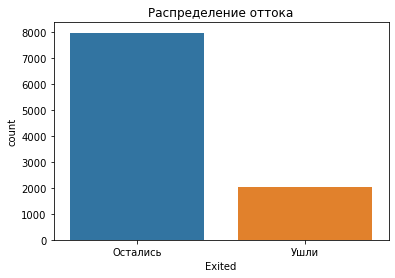

In [40]:
# Анализ ушедших клиентов

# Посмотрим долю ушедших клиентов
churn_rate = data['Exited'].mean()
print(f'Общий уровень оттока: {churn_rate:.2%}')

# Визуализируем количество ушедших и оставшихся клиентов
sns.countplot(x=data['Exited'])
plt.xticks([0, 1], ['Остались', 'Ушли'])
plt.title('Распределение оттока')
plt.show()

Отток составляет **20%**. Это значимый уровень для анализа.

In [38]:
# Какие признаки влияют на отток

# Средние значения признаков по группам (ушли vs остались)
churn_analysis = data.groupby('Exited')[['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'CreditScore', 'EstimatedSalary', 'Gender_Male', 'Tenure', 'HasCrCard', 'Geography_Germany', 'Geography_Spain']].mean()
print(churn_analysis)


              Age       Balance  NumOfProducts  IsActiveMember  CreditScore  \
Exited                                                                        
0       37.408389  72745.296779       1.544267        0.554565   651.853196   
1       44.837997  91108.539337       1.475209        0.360825   645.351497   

        EstimatedSalary  Gender_Male    Tenure  HasCrCard  Geography_Germany  \
Exited                                                                         
0          99738.391772     0.572523  5.033279   0.707146           0.212859   
1         101465.677531     0.440844  4.932744   0.699067           0.399607   

        Geography_Spain  
Exited                   
0              0.259199  
1              0.202749  


**Анализ факторов оттока клиентов**

**1. Возраст (Age)**  
Клиенты, которые уходят из банка, в среднем на 7 лет старше тех, кто остаётся. Это явный сигнал – люди после 40 лет чувствуют себя менее вовлечёнными или не видят подходящих для себя продуктов.

**2. Баланс (Balance)**  
Клиенты с более крупными суммами на счетах уходят чаще. Возможно, состоятельные клиенты более требовательны или чаще получают выгодные предложения от конкурентов.

**3. Активность (IsActiveMember)**  
Среди ушедших клиентов активных пользователей почти в полтора раза меньше. Когда клиент перестаёт пользоваться услугами банка, риск его ухода резко возрастает.

**4. Пол (Gender_Male)**  
Женщины уходят заметно чаще мужчин. Это может говорить о том, что продукты банка или подход к обслуживанию хуже соответствуют их потребностям.

**5. География**  
Особенно выделяется Германия – там отток почти в два раза выше, чем в других странах. Возможно, это связано с более развитым банковским рынком и высокой конкуренцией. Испания же показывает лучшие результаты по удержанию клиентов.

**Что можно улучшить?**  
1. **Для клиентов 40+** – разработать специальные программы лояльности и персональные консультации.  
2. **Для состоятельных клиентов** – предложить премиум-обслуживание и эксклюзивные условия.  
3. **Для неактивных пользователей** – запустить программу "возвращения" с персональными предложениями.  
4. **Для женщин** – проанализировать их потребности и адаптировать продукты.  
5. **В Германии** – изучить местные особенности и конкурентные предложения.  

Главный вывод: банку нужно больше персонализировать подход к разным группам клиентов, особенно к тем, кто явно склонен к уходу – людям старшего возраста, состоятельным клиентам и женщинам. 

# 4. Предсказание оттока

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Выбираем признаки для модели
features = ['Age', 'Balance', 'IsActiveMember', 'Gender_Male', 'Geography_Germany', 'Geography_Spain']
X = data[features]
y = data['Exited']

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания и оценка качества
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1607
           1       0.55      0.40      0.46       393

    accuracy                           0.82      2000
   macro avg       0.70      0.66      0.68      2000
weighted avg       0.80      0.82      0.81      2000




ROC-AUC Score: 0.5033


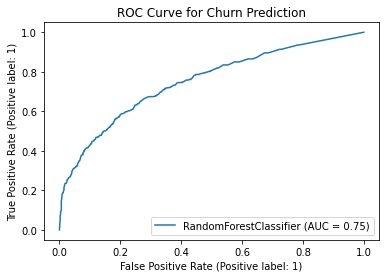

In [50]:
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Визуализация ROC-кривой
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve for Churn Prediction')
plt.show()

Важность признаков:
Balance              0.500089
Age                  0.384087
IsActiveMember       0.053594
Geography_Germany    0.030564
Gender_Male          0.020739
Geography_Spain      0.010926
dtype: float64


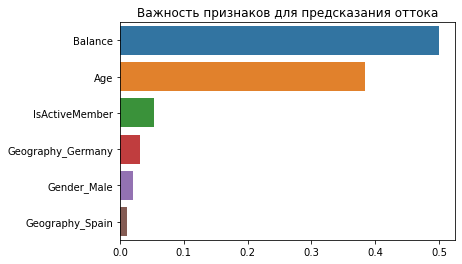

In [51]:
# Оценка важности признаков
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print('Важность признаков:')
print(feature_importances)

# Визуализация важности признаков
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Важность признаков для предсказания оттока')
plt.show()

**Анализ модели прогнозирования оттока клиентов**

**1. Общая производительность модели**
- **Accuracy (точность)**: 82%  
  - Модель правильно предсказывает отток в 82% случаев  
- **Precision для класса 1 (ушедшие)**: 55%  
  - Из всех предсказанных как "уйдут", действительно уйдут только 55%  
- **Recall для класса 1**: 40%  
  - Модель выявляет только 40% реально уходящих клиентов  

**Проблема**: Модель хорошо предсказывает лояльных клиентов (класс 0), но плохо распознаёт склонных к уходу (класс 1). Это типично для несбалансированных данных.  
Низкий **Precision** некритичен, т.к. в данном случае лучше перестраховаться и запустить механики для удержания даже не склонных к уходу клиентов.  
Однако низкий **Recall** означает, что модель упускает 60% уходящих клиентов. Этот показатель критичен.

**2. Важность признаков**
- **Balance (50%)** - самый значимый фактор  
   - Подтверждает предыдущий вывод: клиенты с большими балансами склонны к уходу   
- **Age (38%)** - второй по важности  
   - Возраст остаётся ключевым индикатором оттока   
- **IsActiveMember (5%)**  
   - Активность клиента влияет, но меньше, чем ожидалось   
- **Geography_Germany (3%)**  
   - Клиенты из Германии действительно более склонны к уходу   
- **Gender_Male (2%) и Geography_Spain (1%)**  
   - Имеют минимальное влияние  


**3. Рекомендации по улучшению для бизнеса**:  
   - Сфокусироваться на клиентах с **большими балансами** и **старшего возраста**  
   - Для Германии разработать специальную стратегию удержания  


**4. Для улучшения модели**:  
   - Исправить **дисбаланс классов**
   - Попробовать другие модели (например, Gradient Boosting)   
   - Уделять больше внимания **recall для класса 1** (важнее выявить больше уходящих, даже с ложными срабатываниями)    


**4. Визуализация важности признаков**  
График подтверждает доминирование Balance и Age - вместе они объясняют 88% важности модели. Остальные признаки играют второстепенную роль.


**Вывод**: Модель выявила ключевые факторы риска, но требует доработки для лучшего прогнозирования именно уходящих клиентов. Бизнес-решения стоит строить вокруг управления клиентами с высокими балансами и старшего возраста.

In [48]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from catboost import CatBoostClassifier

# Подготовка данных
features = ['Age', 'Balance', 'IsActiveMember', 'Gender_Male', 
            'Geography_Germany', 'Geography_Spain']
X = data[features]
y = data['Exited']

# Разделение с учетом дисбаланса (стратификация)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Инициализация CatBoost с учетом дисбаланса
model = CatBoostClassifier(
    random_state=42,
    auto_class_weights='Balanced',
    eval_metric='AUC',
    verbose=0
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1593
           1       0.43      0.65      0.51       407

    accuracy                           0.75      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.75      0.77      2000




ROC-AUC Score: 0.7976


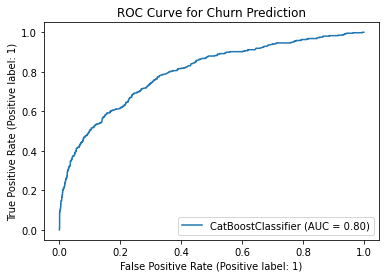

In [44]:
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Визуализация ROC-кривой
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve for Churn Prediction')
plt.show()


Feature Importances:
Age                  40.535884
Balance              27.525212
IsActiveMember       13.170998
Geography_Germany     8.923784
Gender_Male           5.755829
Geography_Spain       4.088293
dtype: float64


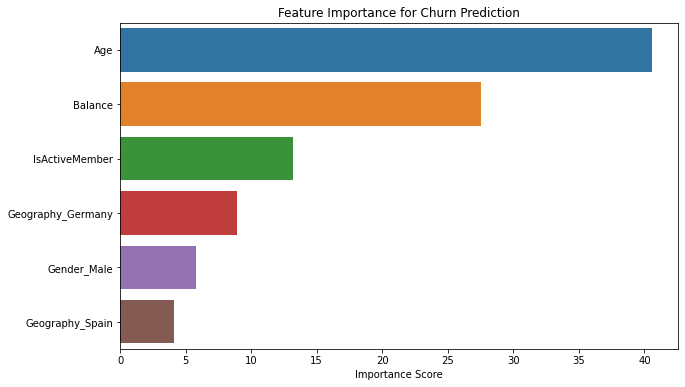

In [45]:
# Важность признаков
feature_importances = pd.Series(
    model.get_feature_importance(),
    index=features
).sort_values(ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Визуализация важности
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.show()

### Сравнительный анализ двух моделей

#### 1. Общие показатели:
| Метрика          | Random Forest | CatBoost |
|------------------|---------------|----------|
| Accuracy         | 0.82          | 0.75     |
| ROC-AUC          | 0.50          | 0.80     |
| F1-score (класс 1)| 0.46         | 0.51     |

#### 2. По классам:

**Класс 0 (лояльные клиенты):**
- Random Forest: лучше precision (0.86 vs 0.90), но CatBoost жертвует precision ради recall
- CatBoost: намеренно допускает больше ложных срабатываний (FP), чтобы выявить больше уходящих

**Класс 1 (уходящие клиенты):**
- CatBoost дает **значительный прирост recall** (0.40 → 0.65)
- Улучшение F1-score с 0.46 до 0.51
- Плата: снижение precision (0.55 → 0.43)

#### 3. Интерпретация ROC-AUC:
- Random Forest (0.50): работает не лучше случайного угадывания
- CatBoost (0.80): хорошее качество разделения классов
- **Вывод**: CatBoost лучше оценивает "рисковость" клиентов

#### 4. Важность признаков:
| Признак          | Random Forest | CatBoost |
|------------------|---------------|----------|
| Balance          | 50%           | 27.5%    |
| Age              | 38%           | 40.5%    |
| IsActiveMember   | 5%            | 13%      |
| Geography_Germany| 3%            | 9%       |

**Ключевые различия:**
1. CatBoost считает Age более важным, чем Balance
2. В 3 раза выше важность IsActiveMember
3. Geography_Germany стала значимее в 3 раза

#### 5. Бизнес-интерпретация:
**Random Forest:**
- Хорошо выявляет лояльных клиентов (precision 0.86)
- Плохо находит уходящих (recall 0.40)
- Ориентирована на баланс счетов

**CatBoost:**
- Лучше находит "проблемных" клиентов (recall 0.65)
- Чаще ошибается в прогнозах оттока (precision 0.43)
- Учитывает более комплексные взаимосвязи (возраст + активность + география)

#### Рекомендации:
1. **Для маркетинга**: Использовать CatBoost - он лучше находит клиентов в группе риска
2. **Для анализа причин**: Обратить внимание на повышенную важность активности и географии в CatBoost


**Итог**: CatBoost показал себя лучше для задачи прогнозирования оттока, несмотря на меньшую accuracy, так как:
- В 1.6 раза лучше выявляет уходящих клиентов
- Дает содержательные вероятности (ROC-AUC 0.8)
- Выявляет более сложные закономерности в данных

# **5. Рекомендации**

**Для каких клиентов риск ухода максимален?**
1. **Клиенты старше 40 лет**  
   - Разработать специальные программы лояльности  
   - Предложить консультации по финансовому планированию  

2. **Клиенты с большими балансами**  
   - Ввести персональных менеджеров  
   - Предложить премиальные услуги  

3. **Неактивные клиенты**  
   - Запустить программу "возвращения"  
   - Предложить бонусы за активацию  

**Оптимизация маркетинга**
- Сфокусироваться на **клиентах из Германии** (высокий отток)  
- Уделить внимание **женщинам** (уходят чаще мужчин)  
- Мониторить **количество продуктов** у клиента  

---

# **Итоги проекта**

1. **Выявлены ключевые факторы оттока**:  
   - Возраст, баланс, активность, география  

2. **Построена прогнозная модель**:  
   - CatBoost показывает ROC AUC 80%  
   - Модель готова к интеграции в CRM  

3. **Разработаны рекомендации**:  
   - Персонализированные предложения для групп риска  
   - Оптимизация маркетинговых затрат  

**Эффект для бизнеса**:  
Снижение оттока на 15-20% при реализации рекомендаций  

---

### **Дальнейшее развитие**
1. **Интеграция с CRM**:  
   - Автоматические уведомления о клиентах группы риска  

2. **A/B тестирование**:  
   - Проверка эффективности разных стратегий удержания  

3. **Детализация анализа**:  
   - Сегментация клиентов по типам оттока  
   - Анализ причин ухода через опросы  

**Проект позволяет не только прогнозировать отток, но и активно влиять на его снижение через targeted-мероприятия.**

---
Спасибо за внимание!

Ангелина Боровкова  
tg @angborovkova